### Fetching the BTC MarketCap

In [1]:
"""
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# Setup
# =======================
API_KEY = os.getenv("GECKO_KEY")  # set this in your environment
headers = {"x-cg-pro-api-key": API_KEY}
url = "https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart"
out_file = "data/processed/btc_marketcap_monthly.csv"

# =======================
# Fetch Data
# =======================
params = {"vs_currency": "usd", "days": "max"}  # full history
res = requests.get(url, params=params, headers=headers)
res.raise_for_status()
data = res.json()

# =======================
# Process Data
# =======================
df = pd.DataFrame(data["market_caps"], columns=["timestamp", "market_cap"])
df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
df = df.set_index("date").drop(columns="timestamp")

# Resample monthly
df_monthly = df.resample("M").last()

# Save
os.makedirs("data/processed", exist_ok=True)
df_monthly.to_csv(out_file)

print(f"✅ BTC Market Cap (monthly) saved to {out_file}")
print(df_monthly.head())

# =======================
# Plot
# =======================
plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly["market_cap"]/1e12, label="BTC Market Cap (Trillions USD)")
plt.xlabel("Date")
plt.ylabel("Market Cap (Trillions USD)")
plt.title("Bitcoin Market Cap (Monthly)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

"""

'\nimport os\nimport requests\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# =======================\n# Setup\n# =======================\nAPI_KEY = os.getenv("GECKO_KEY")  # set this in your environment\nheaders = {"x-cg-pro-api-key": API_KEY}\nurl = "https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart"\nout_file = "data/processed/btc_marketcap_monthly.csv"\n\n# =======================\n# Fetch Data\n# =======================\nparams = {"vs_currency": "usd", "days": "max"}  # full history\nres = requests.get(url, params=params, headers=headers)\nres.raise_for_status()\ndata = res.json()\n\n# =======================\n# Process Data\n# =======================\ndf = pd.DataFrame(data["market_caps"], columns=["timestamp", "market_cap"])\ndf["date"] = pd.to_datetime(df["timestamp"], unit="ms")\ndf = df.set_index("date").drop(columns="timestamp")\n\n# Resample monthly\ndf_monthly = df.resample("M").last()\n\n# Save\nos.makedirs("data/processed", exist_ok=True)\ndf_mon

##### Fetching the BTC MarketCap, BTC Dominance and Total MarketCap and Making Comparison

C:\Users\Muhammad\AppData\Local\Temp\ipykernel_12776\2938919039.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample("M").last()


Saved bitcoin_mcap.csv, global_mcap.csv, btc_dominance_monthly.csv


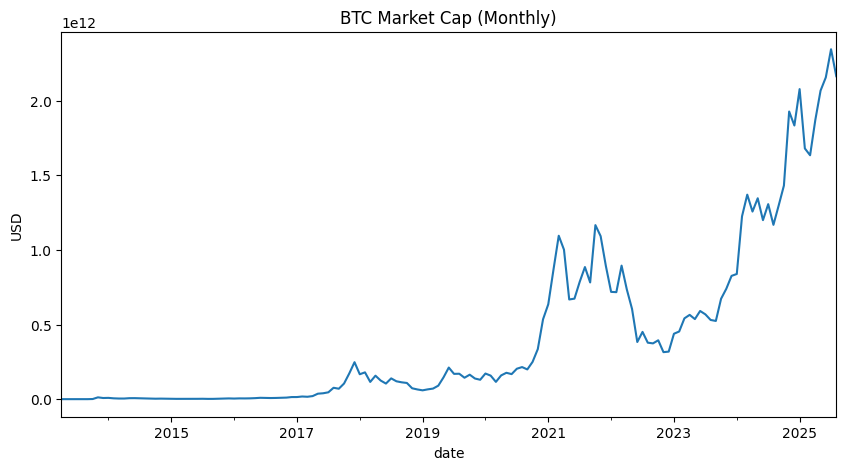

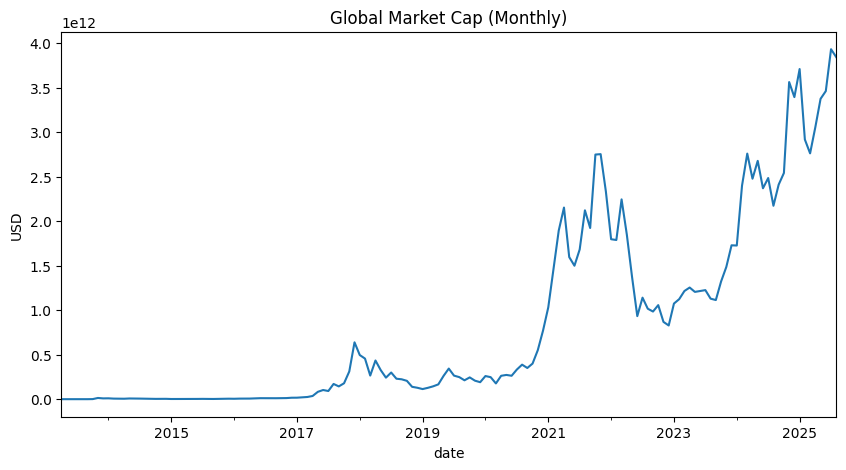

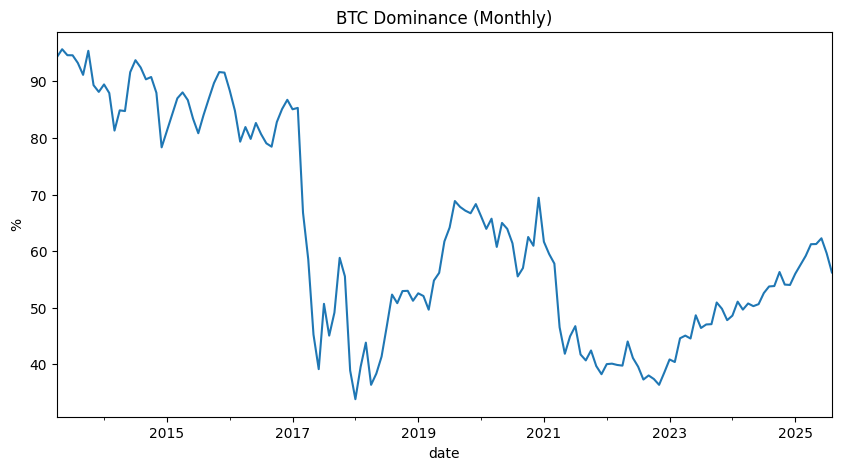

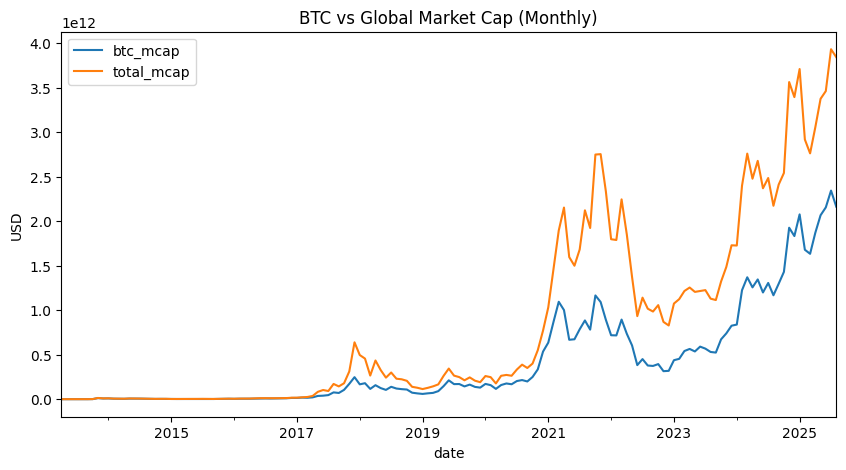

In [2]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# ==============================
# Setup
# ==============================
load_dotenv()
api_key = os.getenv("GECKO_KEY")

headers = {"accept": "application/json", "x-cg-pro-api-key": api_key}
params = {"vs_currency": "usd", "days": "max"}

# ==============================
# 1. Fetch BTC market cap
# ==============================
btc_url = "https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart"
btc_res = requests.get(btc_url, headers=headers, params=params)
btc_res.raise_for_status()
btc_data = btc_res.json()["market_caps"]

df_btc = pd.DataFrame(btc_data, columns=["timestamp", "btc_mcap"])
df_btc["date"] = pd.to_datetime(df_btc["timestamp"], unit="ms")
df_btc = df_btc.set_index("date").drop(columns="timestamp")

# ==============================
# 2. Fetch Global Market Cap
# ==============================
global_url = "https://pro-api.coingecko.com/api/v3/global/market_cap_chart"
global_res = requests.get(global_url, headers=headers, params=params)
global_res.raise_for_status()
global_data = global_res.json()["market_cap_chart"]["market_cap"]

df_global = pd.DataFrame(global_data, columns=["timestamp", "total_mcap"])
df_global["date"] = pd.to_datetime(df_global["timestamp"], unit="ms")
df_global = df_global.set_index("date").drop(columns="timestamp")

# ==============================
# 3. Merge and Compute Dominance
# ==============================
df = pd.concat([df_btc, df_global], axis=1)
df["btc_dominance"] = (df["btc_mcap"] / df["total_mcap"]) * 100

# Resample monthly (end of month)
df_monthly = df.resample("M").last()

# ==============================
# 4. Save Results
# ==============================
df_btc.to_csv("bitcoin_mcap.csv")
df_global.to_csv("global_mcap.csv")
df_monthly.to_csv("btc_dominance_monthly.csv")

print("Saved bitcoin_mcap.csv, global_mcap.csv, btc_dominance_monthly.csv")

# ==============================
# 5. Plotting
# ==============================
# BTC Market Cap
df_monthly["btc_mcap"].plot(title="BTC Market Cap (Monthly)", figsize=(10,5))
plt.ylabel("USD")
#plt.savefig("btc_mcap_monthly.png")
plt.show()

# Global Market Cap
df_monthly["total_mcap"].plot(title="Global Market Cap (Monthly)", figsize=(10,5))
plt.ylabel("USD")
#plt.savefig("global_mcap_monthly.png")
plt.show()

# BTC Dominance
df_monthly["btc_dominance"].plot(title="BTC Dominance (Monthly)", figsize=(10,5))
plt.ylabel("%")
#plt.savefig("btc_dominance_monthly.png")
plt.show()

# Combined Plot
df_monthly[["btc_mcap", "total_mcap"]].plot(title="BTC vs Global Market Cap (Monthly)", figsize=(10,5))
plt.ylabel("USD")
#plt.savefig("btc_vs_global_mcap_monthly.png")
plt.show()


##### Fetching the BTC MarketCap, Other MarketCaps, BTC Dominance and Total MarketCap and Making Comparison

In [3]:
"""
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# ==============================
# Setup
# ==============================
load_dotenv()
api_key = os.getenv("GECKO_KEY")

headers = {"accept": "application/json", "x-cg-pro-api-key": api_key}
params = {"vs_currency": "usd", "days": "max"}

# ==============================
# Helper Function
# ==============================
def fetch_market_cap(coin_id, headers, params):
    url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    res = requests.get(url, headers=headers, params=params)
    res.raise_for_status()
    data = res.json()["market_caps"]
    df = pd.DataFrame(data, columns=["timestamp", f"{coin_id}_mcap"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df.set_index("date").drop(columns="timestamp")

# ==============================
# 1. Fetch BTC, ETH, BNB, XRP
# ==============================
coins = ["bitcoin", "ethereum", "binancecoin", "ripple"]
dfs = {}

for coin in coins:
    dfs[coin] = fetch_market_cap(coin, headers, params)
    dfs[coin].to_csv(f"{coin}_mcap.csv")   # save each separately

# ==============================
# 2. Global Market Cap
# ==============================
global_url = "https://pro-api.coingecko.com/api/v3/global/market_cap_chart"
global_res = requests.get(global_url, headers=headers, params=params)
global_res.raise_for_status()
global_data = global_res.json()["market_cap_chart"]["market_cap"]

df_global = pd.DataFrame(global_data, columns=["timestamp", "total_mcap"])
df_global["date"] = pd.to_datetime(df_global["timestamp"], unit="ms")
df_global = df_global.set_index("date").drop(columns="timestamp")
df_global.to_csv("global_mcap.csv")

# ==============================
# 3. Merge & Monthly Resample
# ==============================
df = pd.concat([dfs["bitcoin"], dfs["ethereum"], dfs["binancecoin"], dfs["ripple"], df_global], axis=1)
df["btc_dominance"] = (df["bitcoin_mcap"] / df["total_mcap"]) * 100

# Resample monthly
df_monthly = df.resample("M").last()
df_monthly.to_csv("all_monthly.csv")

# ==============================
# 4. Plot Individually
# ==============================
for coin in ["bitcoin", "ethereum", "binancecoin", "ripple"]:
    df_monthly[f"{coin}_mcap"].plot(title=f"{coin.capitalize()} Market Cap (Monthly)", figsize=(10,5))
    plt.ylabel("USD")
    #plt.savefig(f"{coin}_mcap_monthly.png")
    plt.show()

# ==============================
# 5. Plot BTC Dominance vs Each Alt
# ==============================

for coin in ["ethereum", "binancecoin", "ripple"]:
    ax = df_monthly[f"{coin}_mcap"].plot(title=f"BTC Dominance vs {coin.capitalize()} Market Cap (Monthly)", figsize=(10,5))
    ax.set_ylabel("Market Cap (USD)")
    ax2 = ax.twinx()
    df_monthly["btc_dominance"].plot(ax=ax2, color="tab:orange")
    ax2.set_ylabel("BTC Dominance (%)")
    #plt.savefig(f"btc_dominance_vs_{coin}_mcap.png")
    plt.show()

"""

'\nimport os\nimport requests\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom dotenv import load_dotenv\n\n# ==============================\n# Setup\n# ==============================\nload_dotenv()\napi_key = os.getenv("GECKO_KEY")\n\nheaders = {"accept": "application/json", "x-cg-pro-api-key": api_key}\nparams = {"vs_currency": "usd", "days": "max"}\n\n# ==============================\n# Helper Function\n# ==============================\ndef fetch_market_cap(coin_id, headers, params):\n    url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"\n    res = requests.get(url, headers=headers, params=params)\n    res.raise_for_status()\n    data = res.json()["market_caps"]\n    df = pd.DataFrame(data, columns=["timestamp", f"{coin_id}_mcap"])\n    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")\n    return df.set_index("date").drop(columns="timestamp")\n\n# ==============================\n# 1. Fetch BTC, ETH, BNB, XRP\n# =============================